<a href="https://colab.research.google.com/github/AaryanBairagi/GeekForGeeks-21Days-21Projects-Challenge/blob/main/Day_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATASET**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("urbikn/sroie-datasetv2")

print("Path to Dataset files : ", path)

100%|██████████| 834M/834M [00:09<00:00, 94.7MB/s]

Extracting files...


Path to Dataset files :  /root/.cache/kagglehub/datasets/urbikn/sroie-datasetv2/versions/4


In [ ]:
!pip install opencv-python matplotlib numpy

In [ ]:
import os

one_image_path = os.path.join(path, 'SROIE2019' , 'train' , 'img' , 'X51005453729.jpg')

In [ ]:
import matplotlib.pyplot as plt
import cv2
def display_image(image,title="Image"):
  plt.figure(figsize=(7,7))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

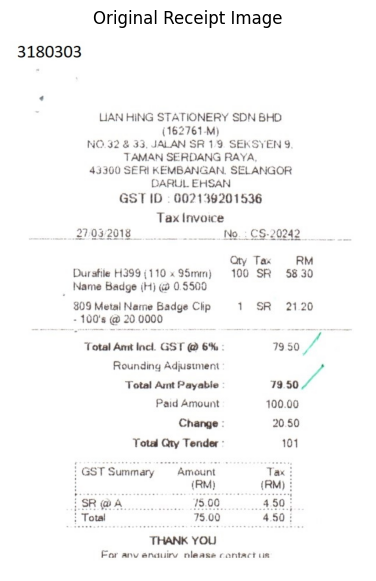

In [ ]:
one_image = cv2.imread(one_image_path)
display_image(one_image,"Original Receipt Image")

In [ ]:
def convert2GrayScale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

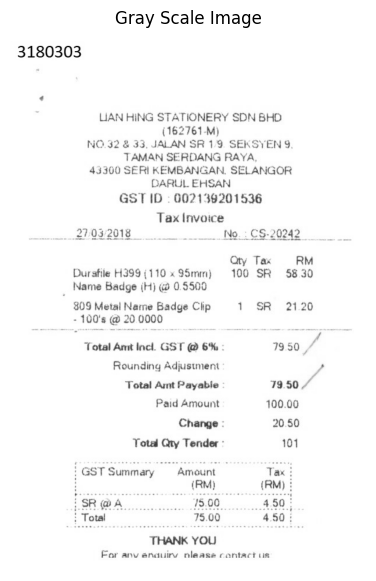

In [ ]:
grayscale_image = convert2GrayScale(one_image)
display_image(grayscale_image,"Gray Scale Image")

In [ ]:
def reduce_noise(image):
  return cv2.GaussianBlur(image,(5,5),0)

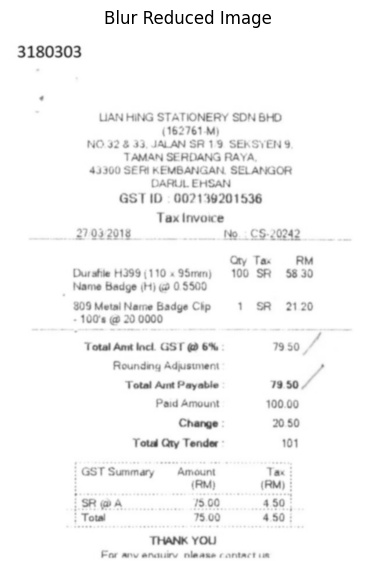

In [ ]:
blurred_image = reduce_noise(grayscale_image)
display_image(blurred_image,"Blur Reduced Image")

In [ ]:
def binarize_image(blur_image):
  return cv2.adaptiveThreshold(blur_image ,
                               255 ,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C ,
                               cv2.THRESH_BINARY_INV , 11 , 4)

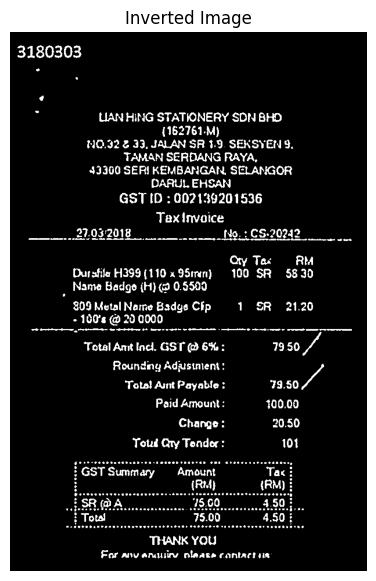

In [ ]:
binarized_image = binarize_image(blurred_image)
display_image(binarized_image,"Inverted Image")

In [ ]:
def deskew_image(image):
  """
  Corrects the skew of an image by finding the minimum area rectangle
  of the text block and rotating accordingly.
  """

  coords = cv2.findNonZero(image)
  rect = cv2.minAreaRect(coords)
  angle = rect[-1] - 90

  if angle < -45 :
    angle = -(90 + angle)
  else :
    angle = -angle

  (h,w) = image.shape[:2]
  center = (w//2 , h//2)

  M = cv2.getRotationMatrix2D(center,angle,1.0)
  rotated = cv2.warpAffine(image,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
  print(f"Detected Skew Angle : {angle:.2f} degrees")

  (h,w) = rotated.shape
  center = (w//2,h//2)
  M = cv2.getRotationMatrix2D(center,angle,1.0)
  deskewed_gray = cv2.warpAffine(rotated,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)

  return deskewed_gray

In [ ]:
deskewed_image = deskew_image(binarized_image)

Detected Skew Angle : 2.91 degrees


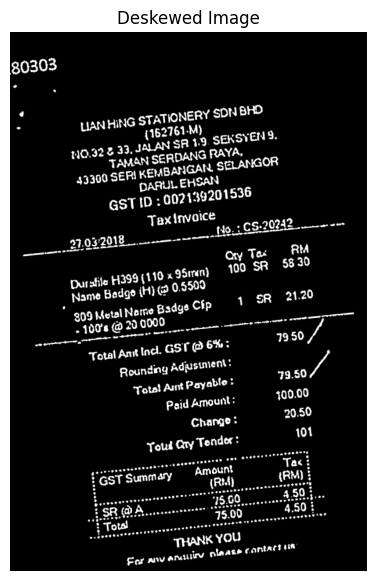

In [ ]:
display_image(deskewed_image,"Deskewed Image")

In [ ]:
def process_one_image(image):
  image = convert2GrayScale(image)
  print("Converted Image to Gray Scale")
  image = reduce_noise(image)
  print("Reduced Noise")
  image = binarize_image(image)
  print("Binarized Image")
  image = deskew_image(image)
  print("Deskewed Image")
  return image

# **PROCESS IMAGE**

In [ ]:
import time
output_folder_path = "/content/processed_images"
start_time = time.time()

os.makedirs(output_folder_path, exist_ok=True)
print(f"Created Folder : {output_folder_path}")

for image_name in os.listdir(os.path.join(path,'SROIE2019','train','img'))[:20]:
  print(f"Processing image : {image_name}")

  image_path = os.path.join(path,'SROIE2019','train','img',image_name)

  image = cv2.imread(image_path)

  processed_image = process_one_image(image)

  output_image_path = os.path.join(output_folder_path,image_name)
  cv2.imwrite(output_image_path,processed_image)
  print(f"Saved processed image to : {output_image_path}")
  print("-"*50)

  print(f"Processing Images is completed.")
  print(f"Total time taken : {time.time() - start_time} seconds")


Created Folder : /content/processed_images
Processing image : X51005568891.jpg
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : -0.00 degrees
Deskewed Image
Saved processed image to : /content/processed_images/X51005568891.jpg
--------------------------------------------------
Processing Images is completed.
Total time taken : 0.13624191284179688 seconds
Processing image : X51005361897.jpg
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : -0.00 degrees
Deskewed Image
Saved processed image to : /content/processed_images/X51005361897.jpg
--------------------------------------------------
Processing Images is completed.
Total time taken : 0.5864052772521973 seconds
Processing image : X51007846412.jpg
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : 1.60 degrees
Deskewed Image
Saved processed image to : /content/processed_images/X51007846412.jpg
------------------------------------------------

# **TEXT EXTRACTION**

In [ ]:
! pip install pytesseract pillow

In [ ]:
from PIL import Image
import pytesseract

In [ ]:
pytesseract.image_to_string(Image.open('/content/processed_images/X51006619496.jpg'))

"Cea that a alae oh Oi he adh Pe eee)\n\nP J\n\n30 ACS Le iat\nPOMC BGs re\ncet meek\n41150 KLANG, SELANGOR °\nRY eat mu!\n\nGST 1D. NOs GOOL81747712\n\nsO CS OCA\n\nOs S107 ai Coo Vs ane\nCY 7 aS cs SR\n‘155 TWISTIES CHIPSTER ORIG © RH2,85's\nmS C0\n\n \n\noye au |\neee eRe\n20 re\nacts Cet a aes\n507 CORE L.SL eee\nPee Owe)\n\nSe eet ee Cyc\nTotal Sales (Inclusive GST) RH 61.65\n\naN CM\n\nCHANGE RH* <0\nSS UEC\nst bh aw) a\na a 24.95. OO\n\nThank You. Please cone again\nKeep the invoice for applicable a\n\nae\n\nSree reer re\n\n \n\x0c"

In [ ]:
from PIL import Image
import pytesseract
import time
import os

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

os.makedirs(output_folder_path , exist_ok=True)
print(f"Created Folder : {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total Images in Folder : {total_images}")

for i , image_name in enumerate(os.listdir(input_folder_path)[:20],1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  text = pytesseract.image_to_string(Image.open(image_path))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
  with open(output_path, "w") as f:
    f.write(text)

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Created Folder : /content/tesseract_output
Total Images in Folder : 20
Processing image 1/20: X51005568891.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51005568891.txt
--------------------------------------------------
Processing image 2/20: X51005361897.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51005361897.txt
--------------------------------------------------
Processing image 3/20: X51007846412.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51007846412.txt
--------------------------------------------------
Processing image 4/20: X51006556838.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51006556838.txt
--------------------------------------------------
Processing image 5/20: X51005719856.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51005719856.txt
---------------------------------------------

# **INFORMATION EXTRACTION**


In [ ]:
prompt = """
Extract the information from the given image.
Information to be extracted: company, date, address, total.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "company": "COMPANY_NAME",
    "date": "DATE",
    "address": "ADDRESS",
    "total": "TOTAL",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:


"""

In [ ]:
from google import genai
from PIL import Image
from google.colab import userdata
import json
import time

In [ ]:
genai_client = genai.Client(api_key=userdata.get("smart_IDP"))

In [ ]:
image_folder_path = '/content/processed_images'
text_folder_path = '/content/tesseract_output'
output_folder_path = '/content/json_output'

start_time = time.time()

os.makedirs(output_folder_path,exist_ok=True)
print(f"Created Folder : {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder : {total_images}")

for i , image_name in enumerate(os.listdir(image_folder_path)[:20],1):
  image_path = os.path.join(image_folder_path , image_name)
  with open(image_path,"rb") as f:
    image = Image.open(image_path)

  text_path = os.path.join(text_folder_path , image_name.replace(".jpg",".txt"))
  with open(text_path , "r") as f:
    text = f.read()

  prompt = prompt + text

  contents = [ image , {"text" : prompt} ]

  response = genai_client.models.generate_content(model='gemini-2.5-flash',contents=contents)

  usage_metadata = response.usage_metadata
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  extracted_information = json.loads(response.text.replace('```json','').replace('```',''))
  print(extracted_information)

  output_path = os.path.join(output_folder_path , image_name.replace(".jpg",".json"))
  with open(output_path,"w") as f:
    json.dump(extracted_information, f, indent=4)

  time.sleep(60)
  print("Information Extraction Completed")
  print(f"Time Taken : {time.time() - start_time} seconds")


Created Folder : /content/json_output
Total images in folder : 20
Input Token Count: 1485
Thoughts Token Count: 319
Output Token Count: 90
Total Token Count: 1894
{'company': 'HON HWA HARDWARE TRADING', 'date': '08/02/2017', 'address': 'NO 37, JALAN MANIS 7, TAMAN SEGAR, 56100 CHERAS, KUALA LUMPUR.', 'total': '277.00'}
Information Extraction Completed
Time Taken : 64.26266384124756 seconds
Input Token Count: 1772
Thoughts Token Count: 1099
Output Token Count: 90
Total Token Count: 2961
{'company': 'TEO HENG STATIONERY & BOOKS', 'date': '17/01/2018', 'address': 'NO. 53, JALAN BESAR, 45600 BATANG KALI, SELANGOR DARUL EHSAN', 'total': '27.55'}
Information Extraction Completed
Time Taken : 133.8345491886139 seconds
Input Token Count: 2171
Thoughts Token Count: 737
Output Token Count: 114
Total Token Count: 3022
{'company': 'LAVENDER CONFECTIONERY & BAKERY S/B', 'date': '17/08/2018', 'address': 'LOT G29 & G30, AEON Mall TEBRAU CITY, NO. 1, JALAN DESA TEBRAU, TAMAN DESA TEBRAU, 81100 JOHOR B

# **SUBMISSION TASK**

In [ ]:
import kagglehub

path_new = kagglehub.dataset_download('snehaanbhawal/resume-dataset')

print("Path to Dataset files : ", path_new)

100%|██████████| 62.5M/62.5M [00:00<00:00, 149MB/s]

Extracting files...


Path to Dataset files :  /root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1


In [ ]:
!pip install pdf2image

In [ ]:
# Install Poppler
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 186 kB in 1s (363 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.10_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.10) ...
Setting up poppler-utils (22.02.0-2ubuntu0.10) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os

for root, dirs, files in os.walk(path_new):
    for file in files:
        if file.endswith('.pdf'):
            print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/96457008.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/99416532.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/69458502.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/31605080.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/37473139.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/17876954.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/81588968.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/29534737.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/AVIATION/15823995.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/ver

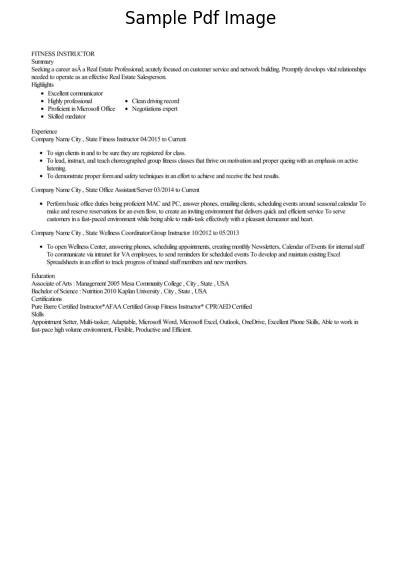

In [ ]:
from pdf2image import convert_from_path
import numpy as np

pdf_path = os.path.join(path_new, 'data' , 'data' , 'FITNESS' , '38650096.pdf')

pages = convert_from_path(pdf_path,dpi=300)

pdf_image = pages[0]

image = cv2.cvtColor(np.array(pdf_image) , cv2.COLOR_RGB2BGR)

display_image(image,"Sample Pdf Image")

# **PDF IMAGE PROCESSING**

In [ ]:
##Using the Image Processing function defined earlier
import time

output_folder_path = '/content/sample_pdf_data'
start_time = time.time()

os.makedirs(output_folder_path,exist_ok=True)
print(f"Folder Created : {output_folder_path}")

for pdf_name in os.listdir(os.path.join(path_new,'data','data','FITNESS'))[:10]:
  print(f"Preprocessing Image : {pdf_name}")
  pdf_path = os.path.join(path_new , 'data' , 'data' , 'FITNESS' , pdf_name)

  pages = convert_from_path(pdf_path,dpi=300)
  pdf_image = pages[0]

  image = cv2.cvtColor(np.array(pdf_image) , cv2.COLOR_RGB2BGR)

  preprocessed_pdf_image = process_one_image(image)

  output_pdf_path = os.path.join(output_folder_path,pdf_name.replace('.pdf','.png'))
  cv2.imwrite(output_pdf_path , preprocessed_pdf_image)
  print(f"Saved processed pdf image to : {output_pdf_path}")
  print("-"*50)

  print(f"Processing Images is completed.")
  print(f"Total time taken : {time.time() - start_time} seconds")


Folder Created : /content/sample_pdf_data
Preprocessing Image : 95769832.pdf
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : -0.29 degrees
Deskewed Image
Saved processed pdf image to : /content/sample_pdf_data/95769832.png
--------------------------------------------------
Processing Images is completed.
Total time taken : 0.6217167377471924 seconds
Preprocessing Image : 21122155.pdf
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : -0.00 degrees
Deskewed Image
Saved processed pdf image to : /content/sample_pdf_data/21122155.png
--------------------------------------------------
Processing Images is completed.
Total time taken : 1.4609291553497314 seconds
Preprocessing Image : 38650096.pdf
Converted Image to Gray Scale
Reduced Noise
Binarized Image
Detected Skew Angle : -0.00 degrees
Deskewed Image
Saved processed pdf image to : /content/sample_pdf_data/38650096.png
--------------------------------------------------
Proc

# **TEXT EXTRACTION**

In [ ]:
from PIL import Image
import pytesseract
import os
import time

output_text_path = '/content/extracted_output'
input_folder_path = '/content/sample_pdf_data'
start_time = time.time()

os.makedirs(output_text_path,exist_ok=True)
print(f"Created Folder : {output_text_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder : {total_images}")

for i , pdf_name in enumerate(os.listdir(input_folder_path)[:10],1):
  print(f"Processing Image : {i}/{total_images} // {pdf_name}")

  image_path = os.path.join(input_folder_path,pdf_name)
  print(f'Extracting Text...')
  text = pytesseract.image_to_string(Image.open(image_path))
  with open(output_path ,'w') as f:
    f.write(text)
  output_path = os.path.join(output_text_path,pdf_name.replace('.png','.txt'))

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")
print(f"--------------------------------------------------------------")


Created Folder : /content/extracted_output
Total images in folder : 10
Processing Image : 1/10 // 95769832.png
Extracting Text...
Saved extracted text to /content/extracted_output/95769832.txt
--------------------------------------------------
Processing Image : 2/10 // 21122155.png
Extracting Text...
Saved extracted text to /content/extracted_output/21122155.txt
--------------------------------------------------
Processing Image : 3/10 // 32636041.png
Extracting Text...
Saved extracted text to /content/extracted_output/32636041.txt
--------------------------------------------------
Processing Image : 4/10 // 35302620.png
Extracting Text...
Saved extracted text to /content/extracted_output/35302620.txt
--------------------------------------------------
Processing Image : 5/10 // 55746506.png
Extracting Text...
Saved extracted text to /content/extracted_output/55746506.txt
--------------------------------------------------
Processing Image : 6/10 // 34792238.png
Extracting Text...
Saved

# **INFORMATION EXTRACTION**

In [ ]:
prompt_pdf = """
# Resume Information Extraction Prompt

Extract the relevant information from the given resume image.

**Information to be extracted:**
- Name
- Email
- Phone
- Address
- Education (degree, university, year)
- Skills
- Work Experience (company, role, duration)
- Projects (name, description, duration)

The resume image has been:
- Converted to grayscale
- Noise reduced
- Binarized
- Deskewed using OpenCV

Always give your response in the following JSON format:

```json
{
    "name": "NAME",
    "email": "EMAIL",
    "phone": "PHONE_NUMBER",
    "address": "ADDRESS",
    "education": [
        {
            "degree": "DEGREE",
            "university": "UNIVERSITY",
            "year": "YEAR"
        }
    ],
    "skills": ["SKILL_1", "SKILL_2", "..."],
    "work_experience": [
        {
            "company": "COMPANY_NAME",
            "role": "ROLE",
            "duration": "DURATION"
        }
    ],
    "projects": [
        {
            "name": "PROJECT_NAME",
            "description": "DESCRIPTION",
            "duration": "DURATION"
        }
    ]
}

## Additional Instructions

- The text has been extracted from the resume image using **Tesseract OCR**.
- Use the extracted text as support for extracting information.
- If you find any information incorrectly extracted, correct it yourself.
- Respond **only** in the specified JSON format.


### Extracted Text from Resume
Here is the text extracted from the resume:

"""

In [ ]:
image_folder_path = '/content/sample_pdf_data'
text_folder_path = '/content/extracted_output'
output_folder_path = '/content/pdf_json_output'

start_time = time.time()

os.makedirs(output_folder_path,exist_ok=True)
print(f"Created Folder : {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder : {total_images}")

for i , pdf_name in enumerate(os.listdir(image_folder_path)[:5],1):
  print(f"Processing Image : {i}/{total_images} // {pdf_name}")

  image_path = os.path.join(image_folder_path , pdf_name)
  with open(image_path,"rb") as f:
    image = Image.open(image_path)

  text_path = os.path.join(text_folder_path , pdf_name.replace(".png",".txt"))
  with open(text_path , "r") as f:
    text = f.read()

  prompt = prompt_pdf + text

  contents = [ image , {"text" : prompt} ]

  response = genai_client.models.generate_content(model='gemini-2.5-flash',contents=contents)

  usage_metadata = response.usage_metadata
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  output_text = response.text
  clean_text = output_text.replace('```json', '').replace('```', '').strip()
  extracted_information = json.loads(clean_text)

  # output_path = os.path.join(output_folder_path , pdf_name.replace(".png",".json"))
  with open(output_path,"w") as f:
    json.dump(extracted_information, f, indent=4)

  print(f"Saved extracted text to {output_path}")
  time.sleep(10)

  print("Information Extraction Completed")
  print(f"Time Taken : {time.time() - start_time} seconds")
  print(f"-------------------------------------------------------------------------")

Created Folder : /content/pdf_json_output
Total images in folder : 10
Processing Image : 1/10 // 95769832.png
Input Token Count: 1613
Thoughts Token Count: 2678
Output Token Count: 393
Total Token Count: 4684
Saved extracted text to /content/pdf_json_output/55746506.json
Information Extraction Completed
Time Taken : 28.242072105407715 seconds
-------------------------------------------------------------------------
Processing Image : 2/10 // 21122155.png
Input Token Count: 1492
Thoughts Token Count: 2513
Output Token Count: 408
Total Token Count: 4413
Saved extracted text to /content/pdf_json_output/55746506.json
Information Extraction Completed
Time Taken : 56.27708601951599 seconds
-------------------------------------------------------------------------
Processing Image : 3/10 // 32636041.png
Input Token Count: 1367
Thoughts Token Count: 2361
Output Token Count: 436
Total Token Count: 4164
Saved extracted text to /content/pdf_json_output/55746506.json
Information Extraction Complete